1-Machine learning(ML) is a computer"s way to learn and make decisions from data wihtout being directly told what to do. Here is when ML can be usful:
-complex proplems: some tasks are too complex for people to solve with traditional rules. for example,identifying people's faces in photos.ML can handle these by learning from lots of examples.
-predictions: if i need to guess future events, like tomorrow's weather, ML is useful. it analyzes past weather data to predict future.
-big data challenges: when data is too vast for manual analysis, ML assists.Online platforms use it to suggest videos or music based on your intrests

When not to use ML:
-limited data: Effective ML requires substantial data. Without enough data, the model's predictions may be unreliable
-clear rules: if a problem has explicit rules, such as mathmatical equations, ML is not needed.ML is intended for scenarios where rules are inferred from data, not predefined. 
-simple proplems: for simple tasks, like basic arithmetic, ML is not necessary.It is excessive to apply a complex ML model for simple calculations
-Rapid changes: ML models rely on hestorical data.if a situation changes quickly, ML models may become outdated

So ML is best for analyzing large data sets to identify patterns and make predictions.However, it is not suitable for every scenario especially those with simple solutions, insufficient data, rapid changes or clear rules.


In [15]:
import pandas as pd
#load the dataset
df= pd.read_csv('Lending_Club.csv')

In [18]:
print(df.head())

                 emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01             113000.0   
1     Not Verified            5.04             113000.0   
2  Source Verified           21.15             113000.0   
3     Not Verified           10.16             113000.0   
4         Verified           57.96              57000.0   

  verification_income_joint  debt_to_income_joint  ...  verified_income_code  \
0              Not Verified                 19.72  ...                     2   
1              Not Ver

quastion 2:

In [41]:
import pandas as pd
df=pd.read_csv('Lending_Club.csv')
numerical_cols= ['annual_income', 'debt_to_income', 'total_credit_lines']
for col in numerical_cols:
    median=df[col].median()
    df[col]= df[col].fillna(median)
categorical_cols= ['emp_title', 'state', 'homeownership']
for col in categorical_cols:
    mode= df[col].mode()[0]
    df[col]= df[col].fillna(mode)
for col in categorical_cols:
    df[col]= df[col].astype('category').cat.codes
df['dti_ratio']= df['debt_to_income'] / df['annual_income']  
df.drop(['emp_length', 'loan_purpose'], axis=1, inplace=True)


quastion 3:

In [42]:
!pip install seaborn matplotlib

     |████████████████████████████████| 294 kB 226 kB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 2.2 MB/s eta 0:00:01    |██▍                             | 849 kB 604 kB/s eta 0:00:18     |███▉                            | 1.4 MB 604 kB/s eta 0:00:17     |███████████████████████         | 8.4 MB 1.6 MB/s eta 0:00:03
     |████████████████████████████████| 310 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 4.3 MB/s eta 0:00:01


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
df= pd.read_csv('Lending_Club.csv')

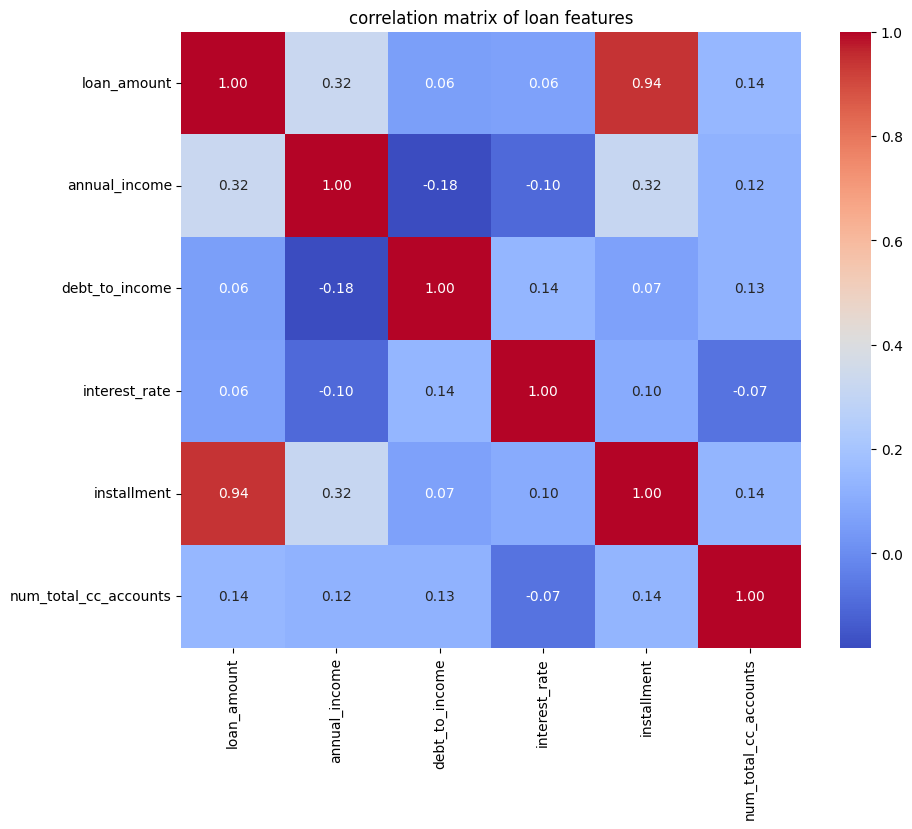

In [54]:
numerical_cols= ['loan_amount', 'annual_income', 'debt_to_income', 'interest_rate', 'installment', 'num_total_cc_accounts']
correlation_matrix= df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix of loan features')
plt.show()
df.columns= df.columns.str.strip()

Takeaways:
-The amount and installment seem to have a very high correlation of 0.94
-Annual income has a moderte correlation of 0.32 with the loan amountand it could mean that people with higher incomes tend to take larger loans which is logical as they might be capable of repaying bigger amounts.
-the number of total creidit card accounts has a very low corrlation with other features like loan anount ans annual income and it is might indicate that the number of credit cards one owns doesn't affect the loan amount one takes or one income
-the interst rate does not show a strong correlation with the loan amount and this imply that the interst rate determined by factors not inculded in this analysis 
-debt to income ratio has a high corrlation of 1 with itself but doesn't showstromg correlation with other variables 

0


/tmp/ipykernel_4576/2505141054.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_amount'].fillna(median_loan_amount, inplace=True)


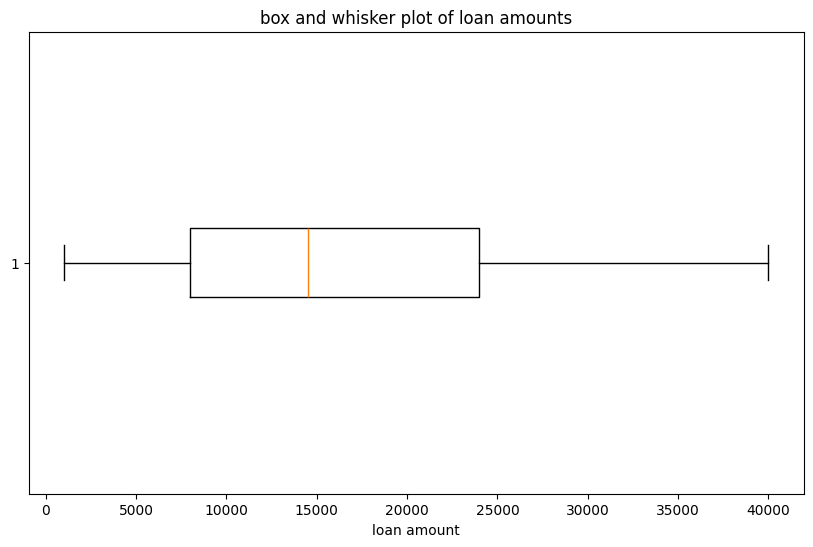

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('Lending_Club.csv')
print (df['loan_amount'].isnull().sum())
median_loan_amount= df['loan_amount'].median()
df['loan_amount'].fillna(median_loan_amount, inplace=True)
plt.figure(figsize=(10, 6))
plt.boxplot(df['loan_amount'], vert=False)
plt.title('box and whisker plot of loan amounts')
plt.xlabel('loan amount')
plt.show()

quastion 5:

In [62]:
import pandas as pd 
import time
df= pd.read_csv('Lending_Club.csv')
regions={
    'Pacific': ['WA', 'OR', 'CA', 'AK', 'HI'],
    'Plains': ['MT', 'ND', 'SD', 'WY', 'NE', 'KS', 'IA', 'MO'],
    'Midwest': ['WI', 'IL', 'MI', 'IN', 'OH', 'MN'],
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'OK', 'TX', 'AR', 'LA']
}

def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'
start_time_lambda= time.time()
df['region_lambda']= df['state'].apply(lambda x: get_region(x))
end_time_lambda= time.time()
start_time_map= time.time()
state_to_region= {state: region for region, states in regions.items() for state in states}
df['region_map']= df['state'].map(state_to_region)
end_time_map= time.time()
lambda_duration= end_time_lambda - start_time_lambda
map_duration= end_time_map - start_time_map
print(f"Lambda function took: {lambda_duration} seconds")
print(f"Map method took: {map_duration} seconds")      

Lambda function took: 0.015234708786010742 seconds
Map method took: 0.003893136978149414 seconds


i used two differnt methods to assign US regions based on states: lambda function and a map method. the lambda function iterates through each row and applies the function to determine the region. the map method uses a dictionary and maps each state directly to its corresponding region. lambda function took 0.01523 seconds while the map method took 0.00389 which make it faster.